<a href="https://colab.research.google.com/github/MDRobiulhassan/Machine-Learning-Course/blob/main/College_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss

In [74]:
df=pd.read_csv('/content/drive/MyDrive/University/7th Semester/MLL/colab/college_student_placement_dataset.csv')

In [75]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None


In [77]:
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df['Placement'] = df['Placement'].map({'No': 0, 'Yes': 1})
df['Internship_Experience'] = df['Internship_Experience'].map({'No': 0, 'Yes': 1})

In [80]:
X = df.drop(columns=['College_ID', 'Placement'])
y = df['Placement']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [82]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

In [84]:
poly = PolynomialFeatures(degree=6, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [85]:
model = SGDClassifier(
    loss='log_loss',
    penalty=None,
    learning_rate='constant',
    eta0=0.0005,
    random_state=42
)

In [86]:
epochs = 500
train_losses, val_losses = [], []
train_acc, val_acc = [], []

In [87]:
X_train_small = X_train_poly[:10000]
y_train_small = y_train[:10000]

In [88]:
for epoch in range(epochs):
    model.partial_fit(X_train_small, y_train_small, classes=np.unique(y_train_small))

    # Predictions
    y_train_prob = model.predict_proba(X_train_small)
    y_val_prob = model.predict_proba(X_test_poly)

    y_train_pred = model.predict(X_train_small)
    y_val_pred = model.predict(X_test_poly)

    # Metrics
    train_losses.append(log_loss(y_train_small, y_train_prob))
    val_losses.append(log_loss(y_test, y_val_prob))
    train_acc.append(accuracy_score(y_train_small, y_train_pred))
    val_acc.append(accuracy_score(y_test, y_val_pred))

In [89]:
def smooth(values, factor=5):
    return [np.mean(values[max(0, i-factor):i+1]) for i in range(len(values))]


In [90]:
train_losses_smooth = smooth(train_losses)
val_losses_smooth = smooth(val_losses)
train_acc_smooth = smooth(train_acc)
val_acc_smooth = smooth(val_acc)

In [91]:
print("Final Epoch Metrics:\n")
print(f"Train Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Train Accuracy: {train_acc[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")


Final Epoch Metrics:

Train Loss: 0.0046
Validation Loss: 0.3670
Train Accuracy: 1.0000
Validation Accuracy: 0.9435


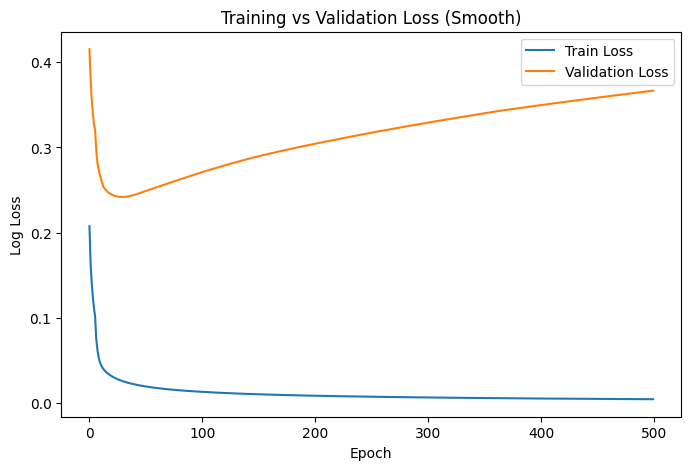

In [92]:
plt.figure(figsize=(8,5))
plt.plot(train_losses_smooth, label='Train Loss')
plt.plot(val_losses_smooth, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss (Smooth)")
plt.legend()
plt.show()

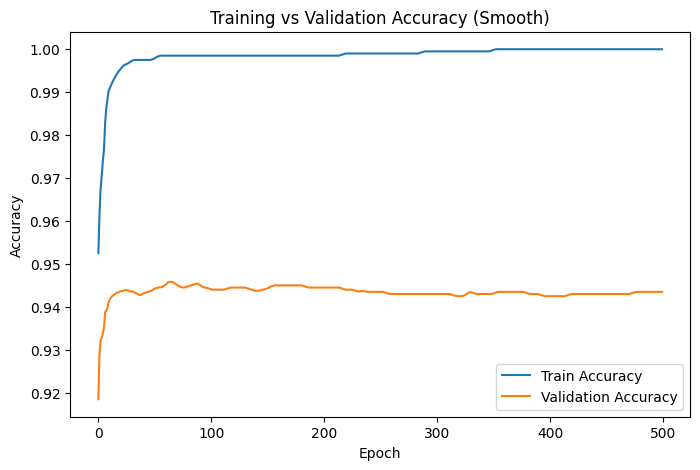

In [93]:
# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(train_acc_smooth, label='Train Accuracy')
plt.plot(val_acc_smooth, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Smooth)")
plt.legend()
plt.show()

In [94]:
model = SGDClassifier(
    loss='log_loss',
    penalty='l1',         # L1 regularization
    alpha=0.0005,         # small regularization strength
    learning_rate='constant',
    eta0=0.0005,
    random_state=42
)

In [95]:
epochs = 500
train_losses, val_losses = [], []
train_acc, val_acc = [], []

for epoch in range(epochs):
    model.partial_fit(X_train_small, y_train_small, classes=np.unique(y_train_small))

    y_train_prob = model.predict_proba(X_train_small)
    y_val_prob = model.predict_proba(X_test_poly)

    y_train_pred = model.predict(X_train_small)
    y_val_pred = model.predict(X_test_poly)

    train_losses.append(log_loss(y_train_small, y_train_prob))
    val_losses.append(log_loss(y_test, y_val_prob))
    train_acc.append(accuracy_score(y_train_small, y_train_pred))
    val_acc.append(accuracy_score(y_test, y_val_pred))

In [96]:
def smooth(values, factor=5):
    return [np.mean(values[max(0, i-factor):i+1]) for i in range(len(values))]

train_losses_smooth = smooth(train_losses)
val_losses_smooth = smooth(val_losses)
train_acc_smooth = smooth(train_acc)
val_acc_smooth = smooth(val_acc)

In [97]:
print("Final Epoch Metrics with L1 Regularization:\n")
print(f"Train Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Train Accuracy: {train_acc[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")


Final Epoch Metrics with L1 Regularization:

Train Loss: 0.0168
Validation Loss: 0.1821
Train Accuracy: 0.9980
Validation Accuracy: 0.9520


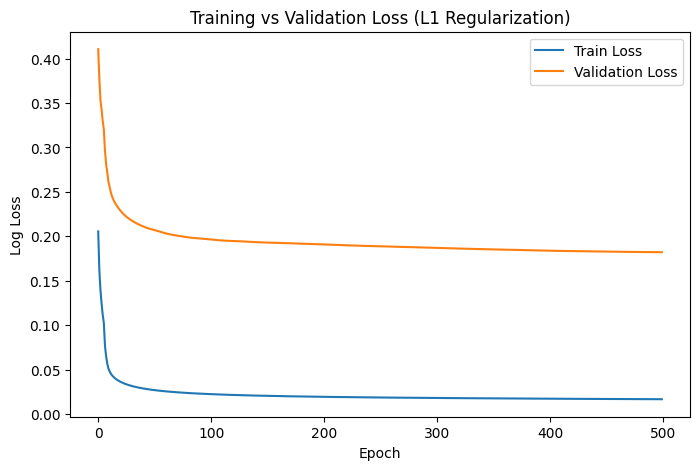

In [98]:
plt.figure(figsize=(8,5))
plt.plot(train_losses_smooth, label='Train Loss')
plt.plot(val_losses_smooth, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss (L1 Regularization)")
plt.legend()
plt.show()


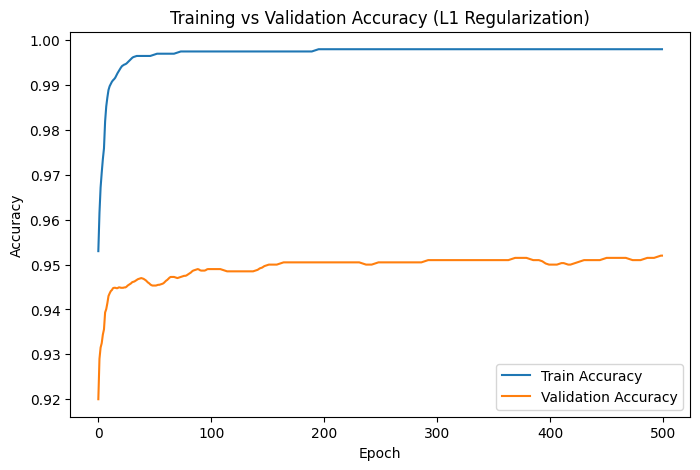

In [99]:
plt.figure(figsize=(8,5))
plt.plot(train_acc_smooth, label='Train Accuracy')
plt.plot(val_acc_smooth, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (L1 Regularization)")
plt.legend()
plt.show()

In [100]:
model = SGDClassifier(
    loss='log_loss',
    penalty='l2',       # L2 regularization
    alpha=0.0005,       # small regularization strength
    learning_rate='constant',
    eta0=0.0005,
    random_state=42
)

In [101]:
epochs = 500
train_losses, val_losses = [], []
train_acc, val_acc = [], []

for epoch in range(epochs):
    model.partial_fit(X_train_small, y_train_small, classes=np.unique(y_train_small))

    y_train_prob = model.predict_proba(X_train_small)
    y_val_prob = model.predict_proba(X_test_poly)

    y_train_pred = model.predict(X_train_small)
    y_val_pred = model.predict(X_test_poly)

    train_losses.append(log_loss(y_train_small, y_train_prob))
    val_losses.append(log_loss(y_test, y_val_prob))
    train_acc.append(accuracy_score(y_train_small, y_train_pred))
    val_acc.append(accuracy_score(y_test, y_val_pred))

In [102]:
def smooth(values, factor=5):
    return [np.mean(values[max(0, i-factor):i+1]) for i in range(len(values))]

train_losses_smooth = smooth(train_losses)
val_losses_smooth = smooth(val_losses)
train_acc_smooth = smooth(train_acc)
val_acc_smooth = smooth(val_acc)

In [103]:
print("Final Epoch Metrics with L2 Regularization:\n")
print(f"Train Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Train Accuracy: {train_acc[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")

Final Epoch Metrics with L2 Regularization:

Train Loss: 0.0058
Validation Loss: 0.3335
Train Accuracy: 1.0000
Validation Accuracy: 0.9430


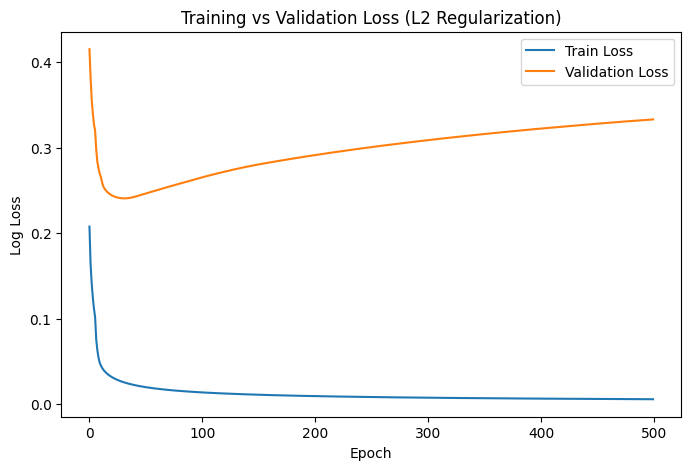

In [104]:
plt.figure(figsize=(8,5))
plt.plot(train_losses_smooth, label='Train Loss')
plt.plot(val_losses_smooth, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss (L2 Regularization)")
plt.legend()
plt.show()


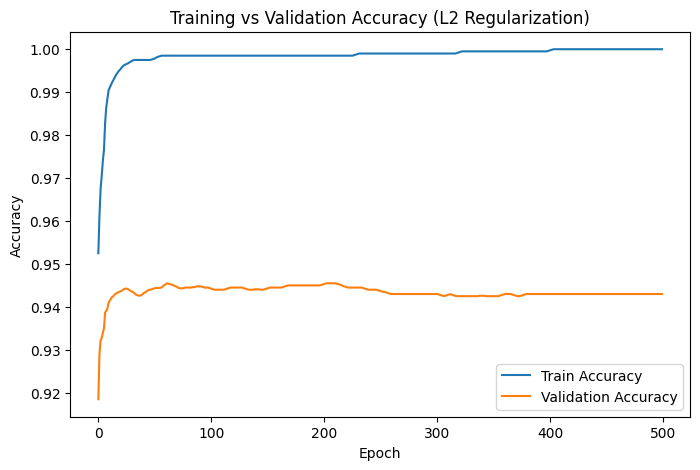

In [105]:
plt.figure(figsize=(8,5))
plt.plot(train_acc_smooth, label='Train Accuracy')
plt.plot(val_acc_smooth, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (L2 Regularization)")
plt.legend()
plt.show()

In [106]:
model = SGDClassifier(
    loss='log_loss',
    penalty='elasticnet',
    l1_ratio=0.5,      # 50% L1 + 50% L2
    alpha=0.0005,
    learning_rate='constant',
    eta0=0.0005,
    random_state=42
)

In [107]:
epochs = 500
train_losses, val_losses = [], []
train_acc, val_acc = [], []

for epoch in range(epochs):
    model.partial_fit(X_train_small, y_train_small, classes=np.unique(y_train_small))

    y_train_prob = model.predict_proba(X_train_small)
    y_val_prob = model.predict_proba(X_test_poly)

    y_train_pred = model.predict(X_train_small)
    y_val_pred = model.predict(X_test_poly)

    train_losses.append(log_loss(y_train_small, y_train_prob))
    val_losses.append(log_loss(y_test, y_val_prob))
    train_acc.append(accuracy_score(y_train_small, y_train_pred))
    val_acc.append(accuracy_score(y_test, y_val_pred))

In [108]:
def smooth(values, factor=5):
    return [np.mean(values[max(0, i-factor):i+1]) for i in range(len(values))]

In [109]:
train_losses_smooth = smooth(train_losses)
val_losses_smooth = smooth(val_losses)
train_acc_smooth = smooth(train_acc)
val_acc_smooth = smooth(val_acc)

In [110]:
print("Final Epoch Metrics with Elastic Net (L1+L2):\n")
print(f"Train Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Train Accuracy: {train_acc[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")

Final Epoch Metrics with Elastic Net (L1+L2):

Train Loss: 0.0121
Validation Loss: 0.2229
Train Accuracy: 0.9985
Validation Accuracy: 0.9510


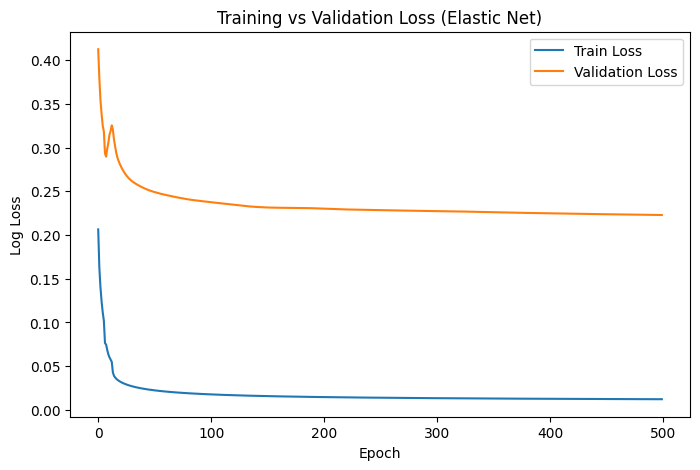

In [111]:
plt.figure(figsize=(8,5))
plt.plot(train_losses_smooth, label='Train Loss')
plt.plot(val_losses_smooth, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss (Elastic Net)")
plt.legend()
plt.show()

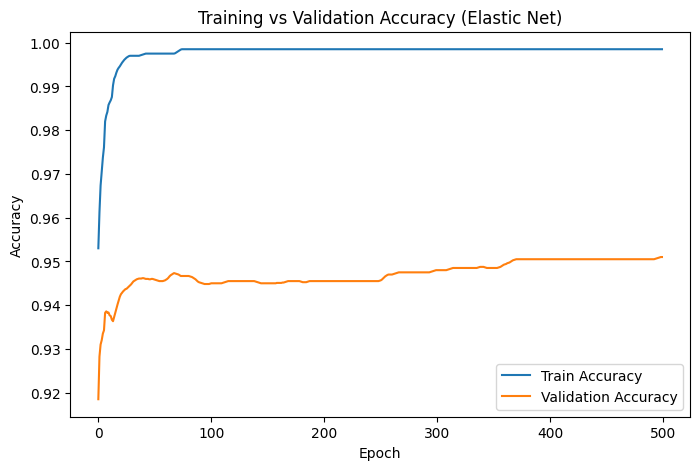

In [112]:
plt.figure(figsize=(8,5))
plt.plot(train_acc_smooth, label='Train Accuracy')
plt.plot(val_acc_smooth, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Elastic Net)")
plt.legend()
plt.show()

In [113]:
model = SGDClassifier(
    loss='log_loss',
    penalty='elasticnet',
    l1_ratio=0.5,
    alpha=0.0005,
    learning_rate='constant',
    eta0=0.0005,
    random_state=42
)

In [114]:
epochs = 500
patience = 20          # stop if no improvement for 20 epochs
best_val_loss = np.inf
wait = 0


In [115]:
train_losses, val_losses = [], []
train_acc, val_acc = [], []

In [116]:
for epoch in range(epochs):
    model.partial_fit(X_train_small, y_train_small, classes=np.unique(y_train_small))

    y_train_prob = model.predict_proba(X_train_small)
    y_val_prob = model.predict_proba(X_test_poly)

    y_train_pred = model.predict(X_train_small)
    y_val_pred = model.predict(X_test_poly)

    # Metrics
    t_loss = log_loss(y_train_small, y_train_prob)
    v_loss = log_loss(y_test, y_val_prob)
    t_acc = accuracy_score(y_train_small, y_train_pred)
    v_acc = accuracy_score(y_test, y_val_pred)

    train_losses.append(t_loss)
    val_losses.append(v_loss)
    train_acc.append(t_acc)
    val_acc.append(v_acc)

    # Early stopping check
    if v_loss < best_val_loss:
        best_val_loss = v_loss
        wait = 0
        best_epoch = epoch
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

Early stopping triggered at epoch 27


In [117]:
def smooth(values, factor=5):
    return [np.mean(values[max(0, i-factor):i+1]) for i in range(len(values))]

In [118]:
train_losses_smooth = smooth(train_losses)
val_losses_smooth = smooth(val_losses)
train_acc_smooth = smooth(train_acc)
val_acc_smooth = smooth(val_acc)

In [119]:
print("Final Epoch Metrics with Early Stopping:\n")
print(f"Train Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Train Accuracy: {train_acc[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Stopped at Epoch: {len(train_losses)} (Best Epoch: {best_epoch+1})")

Final Epoch Metrics with Early Stopping:

Train Loss: 0.0274
Validation Loss: 0.2629
Train Accuracy: 0.9970
Validation Accuracy: 0.9450
Stopped at Epoch: 27 (Best Epoch: 7)


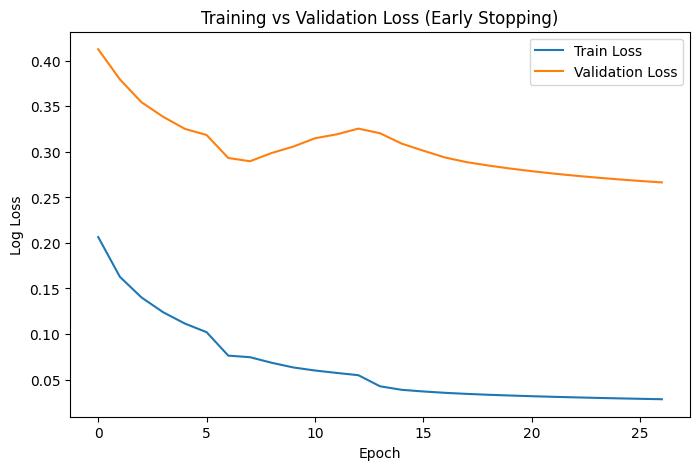

In [120]:
plt.figure(figsize=(8,5))
plt.plot(train_losses_smooth, label='Train Loss')
plt.plot(val_losses_smooth, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss (Early Stopping)")
plt.legend()
plt.show()


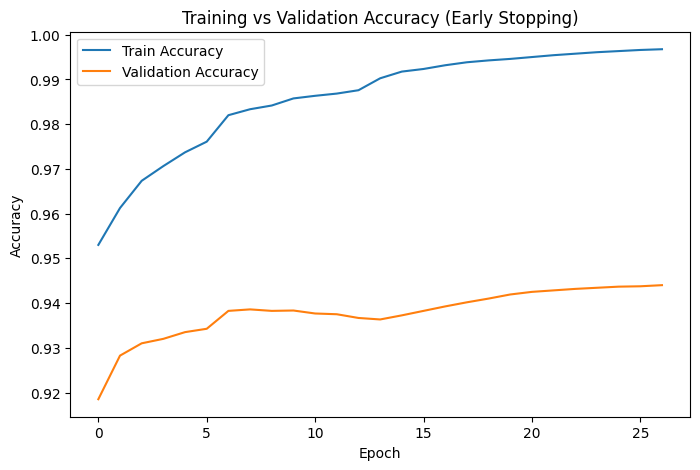

In [121]:
plt.figure(figsize=(8,5))
plt.plot(train_acc_smooth, label='Train Accuracy')
plt.plot(val_acc_smooth, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Early Stopping)")
plt.legend()
plt.show()